# <p style="background-color:#404E65;color:white;font-size:150%;text-align:center;border-radius:10px 10px;height:70px;padding-top: 20px;">E-Commerce Customer Segmentation</p>


Customer segmentation is an effective tool for businesses to closely align their strategy and tactics with, and better target, their customers. Every customer is different and every customer journey is different so a single approach often isn’t going to work for all. This is where customer segmentation becomes a valuable process.

> Customer segmentation is the process by which you divide your customers into segments up based on common characteristics – such as demographics or behaviors, so you can market to those customers more effectively.

Customer segmentation can be broken down into two types: 
- Segmenting customers based on who they are: the process of understanding who customers are typically focuses on demographics.
- Segmenting customers based on what they do: you can also segment customers based on how much they spend (share of wallet), how often, and what products (this allows you to see how much you can increase spend). This is more behavior focused. **That's the data we have and the kind of segmentation we will do.**


### Research questions
The aim of the study is to answer the below research questions:
- What is the general sales trend?
- What is an average cart by country?
- What countries are the most active?
- What are the best selling products?
- How often do customers buy products?
- How many new customers each months?
- When do customers tend to purchase products?


### About the dataset

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Features

1. *InvoiceNo*: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
2. *StockCode*: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
3. *Description*: Product (item) name. Nominal. 
4. *Quantity*: The quantities of each product (item) per transaction. Numeric. 
5. *InvoiceDate*: Invice Date and time. Numeric, the day and time when each transaction was generated. 
6. *UnitPrice*: Unit price. Numeric, Product price per unit in sterling. 
7. *CustomerID*: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
8. *Country*: Country name. Nominal, the name of the country where each customer resides.

---

## Imports

In [381]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import datetime as dt

sns.set_style('whitegrid')

In [382]:
df = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%203/data/data.csv",encoding = 'unicode_escape')

print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))
df.head()

There are 541909 observations for 8 predictors.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [384]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df[(df["InvoiceDate"].dt.year!=2011)|(df["InvoiceDate"].dt.month!=12)]
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [385]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     127216
Description      1439
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

# <p style="background-color:#5C739C;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">1. Data Cleaning</p>

In [386]:
#as we can see in the dataset we have lot of  values as missing and nan values also some are marked as ?

df[df.isin(["NaN","missing","?","??"]).any(axis=1) == True].head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
43662,540100,22837,?,-106,2011-01-04 16:53:00,0.0,NaN,United Kingdom
50806,540558,21258,?,-29,2011-01-10 10:04:00,0.0,NaN,United Kingdom
51673,540651,82599,?,-290,2011-01-10 15:00:00,0.0,NaN,United Kingdom
68920,541882,48185,?,-57,2011-01-24 10:54:00,0.0,NaN,United Kingdom
78235,542861,47591B,?,-207,2011-02-01 11:47:00,0.0,NaN,United Kingdom
94765,544410,84997C,?,-741,2011-02-18 13:54:00,0.0,NaN,United Kingdom
97643,544649,21621,?,-400,2011-02-22 12:37:00,0.0,NaN,United Kingdom


In [387]:
#removing all the Nan data and data marked as missing and ? , ??
df = df[df.isin(["NaN","missing","?","??"]).any(axis=1) == False]

In [388]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


As description column is important for clustering the customers , we can see that there is inconsistencies in the data format.

In [389]:
df['Description'].nunique()

4211

In [390]:
#converting the data to lowercase and stripping the data to get the accurate number of unique data.
df['Description'].str.lower().str.strip().nunique()

4183

In [391]:
#updating the column
df['Description'] = df['Description'].str.lower().str.strip()

Also delete null price and quantities from the dataset if any . some items have quantity and unit price as zero which isnt right .

In [392]:
df = df[(df["UnitPrice"]!=0)&(df["Quantity"]!=0)]

>> Dealing with data inconsistencies . 

> So the main task is to keep the description data unique . so for that the the number of stock code must be equal to product description

In [393]:
print('Unique description' ,df["Description"].nunique() )
print('Unique stock code' ,df["StockCode"].nunique() )

Unique description 4028
Unique stock code 3935


In [394]:
df.groupby('StockCode')['Description'].nunique().sort_values(ascending=False)

StockCode
23196    4
23236    4
22937    3
23366    3
23126    3
        ..
22423    1
22424    1
22425    1
22426    1
m        1
Name: Description, Length: 3935, dtype: int64

Its the same product , but written in different ways . So i will keep the first description that appears as the same .

In [395]:
#using groupby will get the first description of each stockcode
first_description = df.groupby('StockCode')['Description'].first()

#now updating the description column with the first value based on the stock code
df['Description'] = df['StockCode'].map(first_description)

In [396]:
#lets check whether the each description has one stock code
df.groupby("Description")["StockCode"].nunique().sort_values(ascending = False)

Description
metal sign,cupcake single hook         6
set of 4 fairy cake placemats          4
columbian candle round                 3
vinyl record frame silver              2
white bird garden design mug           2
                                      ..
french style embossed heart cabinet    1
french style storage jar bonbons       1
french style storage jar cafe          1
french style storage jar jam           1
zinc wire sweetheart letter tray       1
Name: StockCode, Length: 3801, dtype: int64

In [397]:
#as we can see some descriptions have multiple stock codes coz same description has multiple stock codes 

# Use groupby to get the first StockCode for each Description
first_codes = df.groupby('Description')['StockCode'].first()

# Update the 'StockCode' column
df['StockCode'] = df['Description'].map(first_codes)

Now each stock code has one unique product description and vice versa .

In [398]:
#checking for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     124795
Country             0
dtype: int64

#### Deal with outliers .

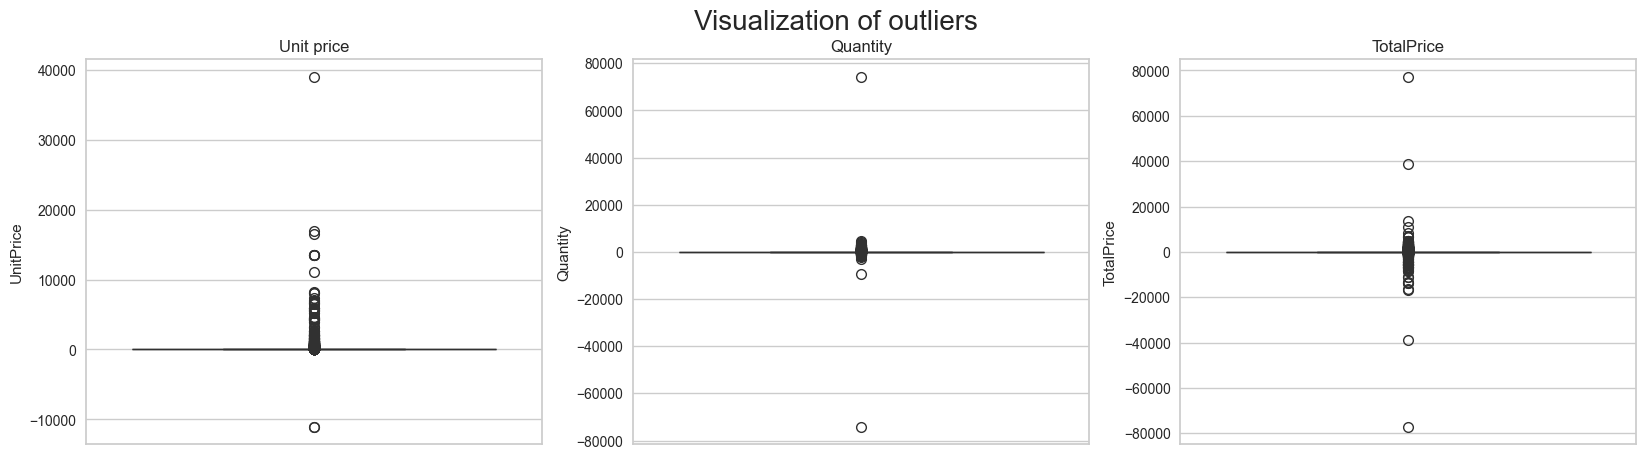

In [399]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

fig = plt.figure(figsize=(20 , 5))
fig.suptitle("Visualization of outliers" , size = 20)

axes = fig.add_subplot(1,3,1)
sns.boxplot(data = df , y = 'UnitPrice')
axes.set_title('Unit price')

axes = fig.add_subplot(1 ,3 , 2)
sns.boxplot(data = df , y = "Quantity")
axes.set_title('Quantity')

axes = fig.add_subplot(1,3,3)
sns.boxplot(data = df , y = 'TotalPrice')
axes.set_title('TotalPrice')

plt.show()

In [400]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[["TotalPrice"]])) < 3).all(axis=1)]

# <p style="background-color:#5C739C;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">2. Exploratory Data Analysis</p>

### What is the usual sales trend ?

To understand the sales trend we need to plot the sales for each day through the studies period of time

In [401]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [402]:
#creating a dataframe having general trend 

general_trend = pd.DataFrame(data = {'Date':pd.to_datetime(df.InvoiceDate).dt.date , 
                                     'Total price' : df.Quantity * df.UnitPrice})

general_trend = general_trend.groupby('Date')['Total price'].sum() #caLculating the sales of each date
general_trend = pd.DataFrame(general_trend)

In [403]:
# Create a date range from December 2010 to November 2011
dates = pd.date_range(start="2010-12-01", end="2011-11-30", freq='MS').tolist()

In [404]:
rolling_days = general_trend.copy()

#lets create a moving average for total price for every 30 days 
rolling_days['Total price'] = rolling_days['Total price'].rolling(window=30).mean()

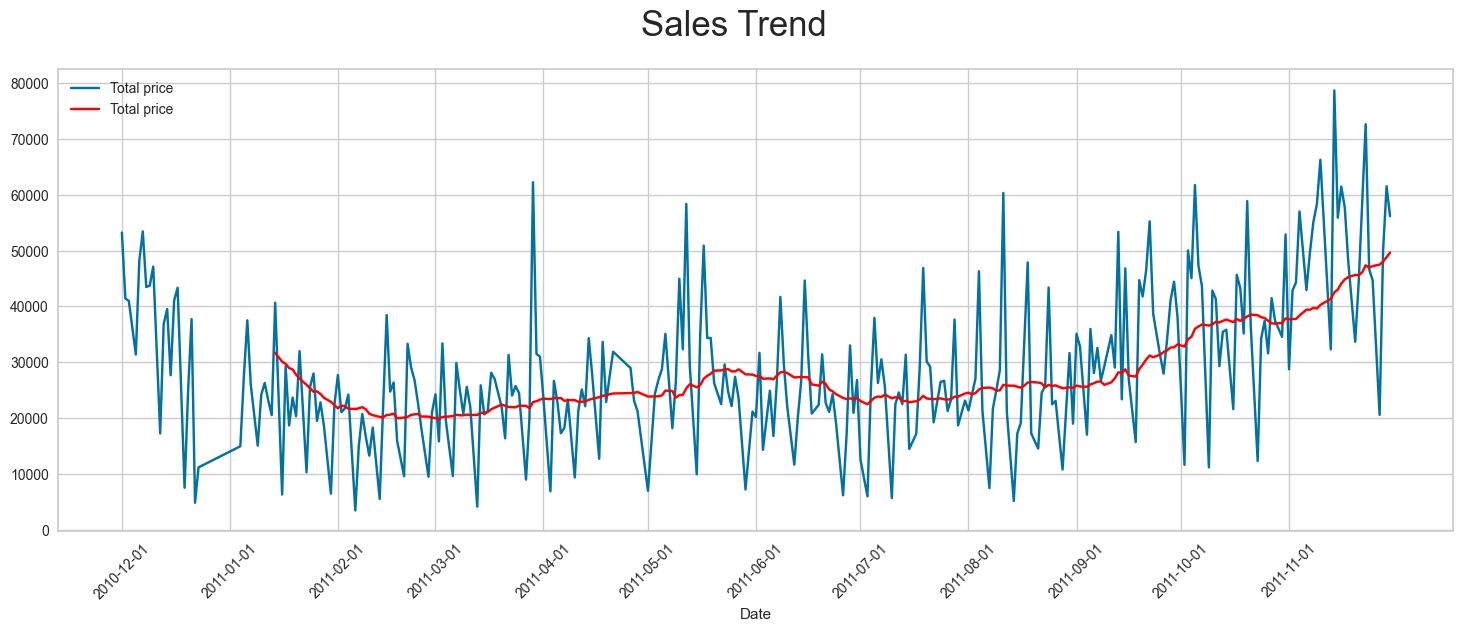

In [405]:
plt.figure(figsize=(18,6)).suptitle('Sales Trend' , fontsize = 25)
sns.lineplot(data = general_trend)
sns.lineplot(data = rolling_days , palette=['red'])
plt.xticks(dates , rotation = 45) #rotates label by 45 degree
plt.show()

In [406]:
general_trend.index = pd.to_datetime(general_trend.index)
general_trend_months = general_trend.groupby([general_trend.index.year ,general_trend.index.month])['Total price'].sum()
general_trend_months = pd.DataFrame(general_trend_months)
general_trend_months

Total price
Date Date             
2010 12     694538.760
2011 1      539326.370
     2      485332.440
     3      650498.050
     4      480575.661
     5      700656.130
     6      627183.140
     7      634301.311
     8      659839.890
     9      911183.202
     10     978138.660
     11    1322569.040

In [407]:
general_trend_months['Date'] = dates

> 📌 From this curve giving the sales trend between december 2010 and december 2011, it seems that the general sales was quite stable untill august 2011. The general sales increases drastically and are almost multiplied by 3. This increase may also be linked to end of the year celebrations, where people tend to buy more products.

---

### What is an average cart by country ?

In this part lets study the trends per countries to spot any differences.

In [408]:
#lets group the countries based on total price , unit price & quantity

avg_cart_countries = df.groupby('Country').TotalPrice.mean()
avg_cart_countries = pd.DataFrame(avg_cart_countries).reset_index()

avg_price_countries = df.groupby('Country').UnitPrice.mean()
avg_price_countries = pd.DataFrame(avg_price_countries).reset_index()

avg_quantity_countries = df.groupby('Country').Quantity.mean()
avg_quantity_countries = pd.DataFrame(avg_quantity_countries).reset_index()

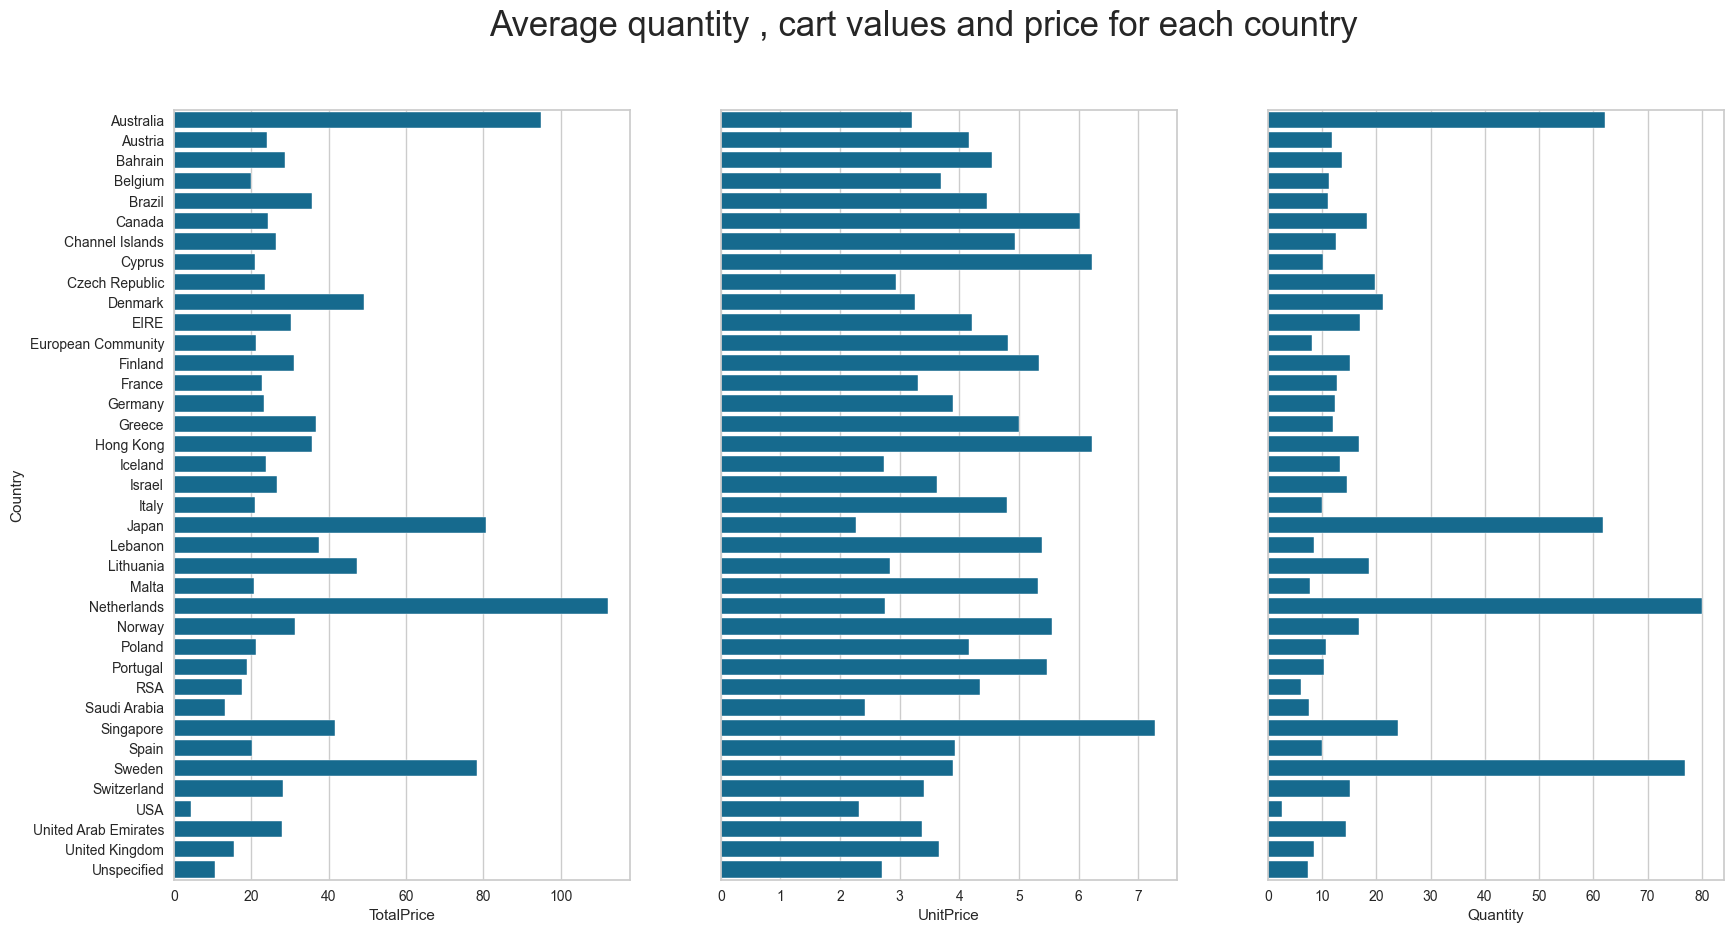

In [409]:
fig = plt.figure(figsize=(20 ,10))
fig.suptitle("Average quantity , cart values and price for each country" , fontsize = 25)

axes = fig.add_subplot(1,3,1)
sns.barplot(data = avg_cart_countries , x = 'TotalPrice' , y = 'Country')

axes = fig.add_subplot(1,3,2)
sns.barplot(data = avg_price_countries , x = 'UnitPrice' , y = 'Country')
fig.axes[1].get_yaxis().set_visible(False)

axes = fig.add_subplot(1,3,3)
sns.barplot(data = avg_quantity_countries , x = 'Quantity' , y = 'Country')
fig.axes[2].get_yaxis().set_visible(False)

>📌 There are four countries that tend to buy have an average cart bigger than the others: the Netherlands, Australia, Japan and Sweden. Based on the plots for quantity and total prices, it seems that those countries have a bigger carts because of quantities, a customer from those countries will buy more quantities than in others.
>
> Hong Kong and Singapore customers tend to be more attracted by expensive items.

### How often do customers purchase per country ?

In [410]:
df.groupby([df.Country , df.InvoiceDate]).Description

In [411]:
#Grouping the total transactions done by each country

count_transactions_per_country = df.groupby([df.Country,df.InvoiceDate]).Description.count().reset_index()
count_transactions_per_country = count_transactions_per_country.groupby([count_transactions_per_country.Country]).Description.sum()
count_transactions_per_country = pd.DataFrame(count_transactions_per_country)

In [412]:
#Grouping the total number of unique customers per country

unique_per_country = df.groupby([df.Country]).CustomerID.nunique()
unique_per_country = pd.DataFrame(unique_per_country)
unique_per_country = unique_per_country.drop("Hong Kong")

In [413]:
#Concatenating both the dataframes to a single dataframe
transactions_per_customer_per_countries = pd.concat([count_transactions_per_country,unique_per_country],axis=1).reset_index()

#Dividing the count of description dividing by the unique customer id and dividing by 12 to get the avg monthly purchase
transactions_per_customer_per_countries['Value'] = transactions_per_customer_per_countries["Description"]/transactions_per_customer_per_countries["CustomerID"]/12
transactions_per_customer_per_countries

,Country,Description,CustomerID,Value
0,Australia,1234,9.0,11.425926
1,Austria,394,11.0,2.984848
2,Bahrain,19,2.0,0.791667
3,Belgium,1971,25.0,6.570000
4,Brazil,32,1.0,2.666667
5,Canada,151,4.0,3.145833
6,Channel Islands,752,9.0,6.962963
7,Cyprus,618,8.0,6.437500
8,Czech Republic,30,1.0,2.500000
9,Denmark,378,8.0,3.937500


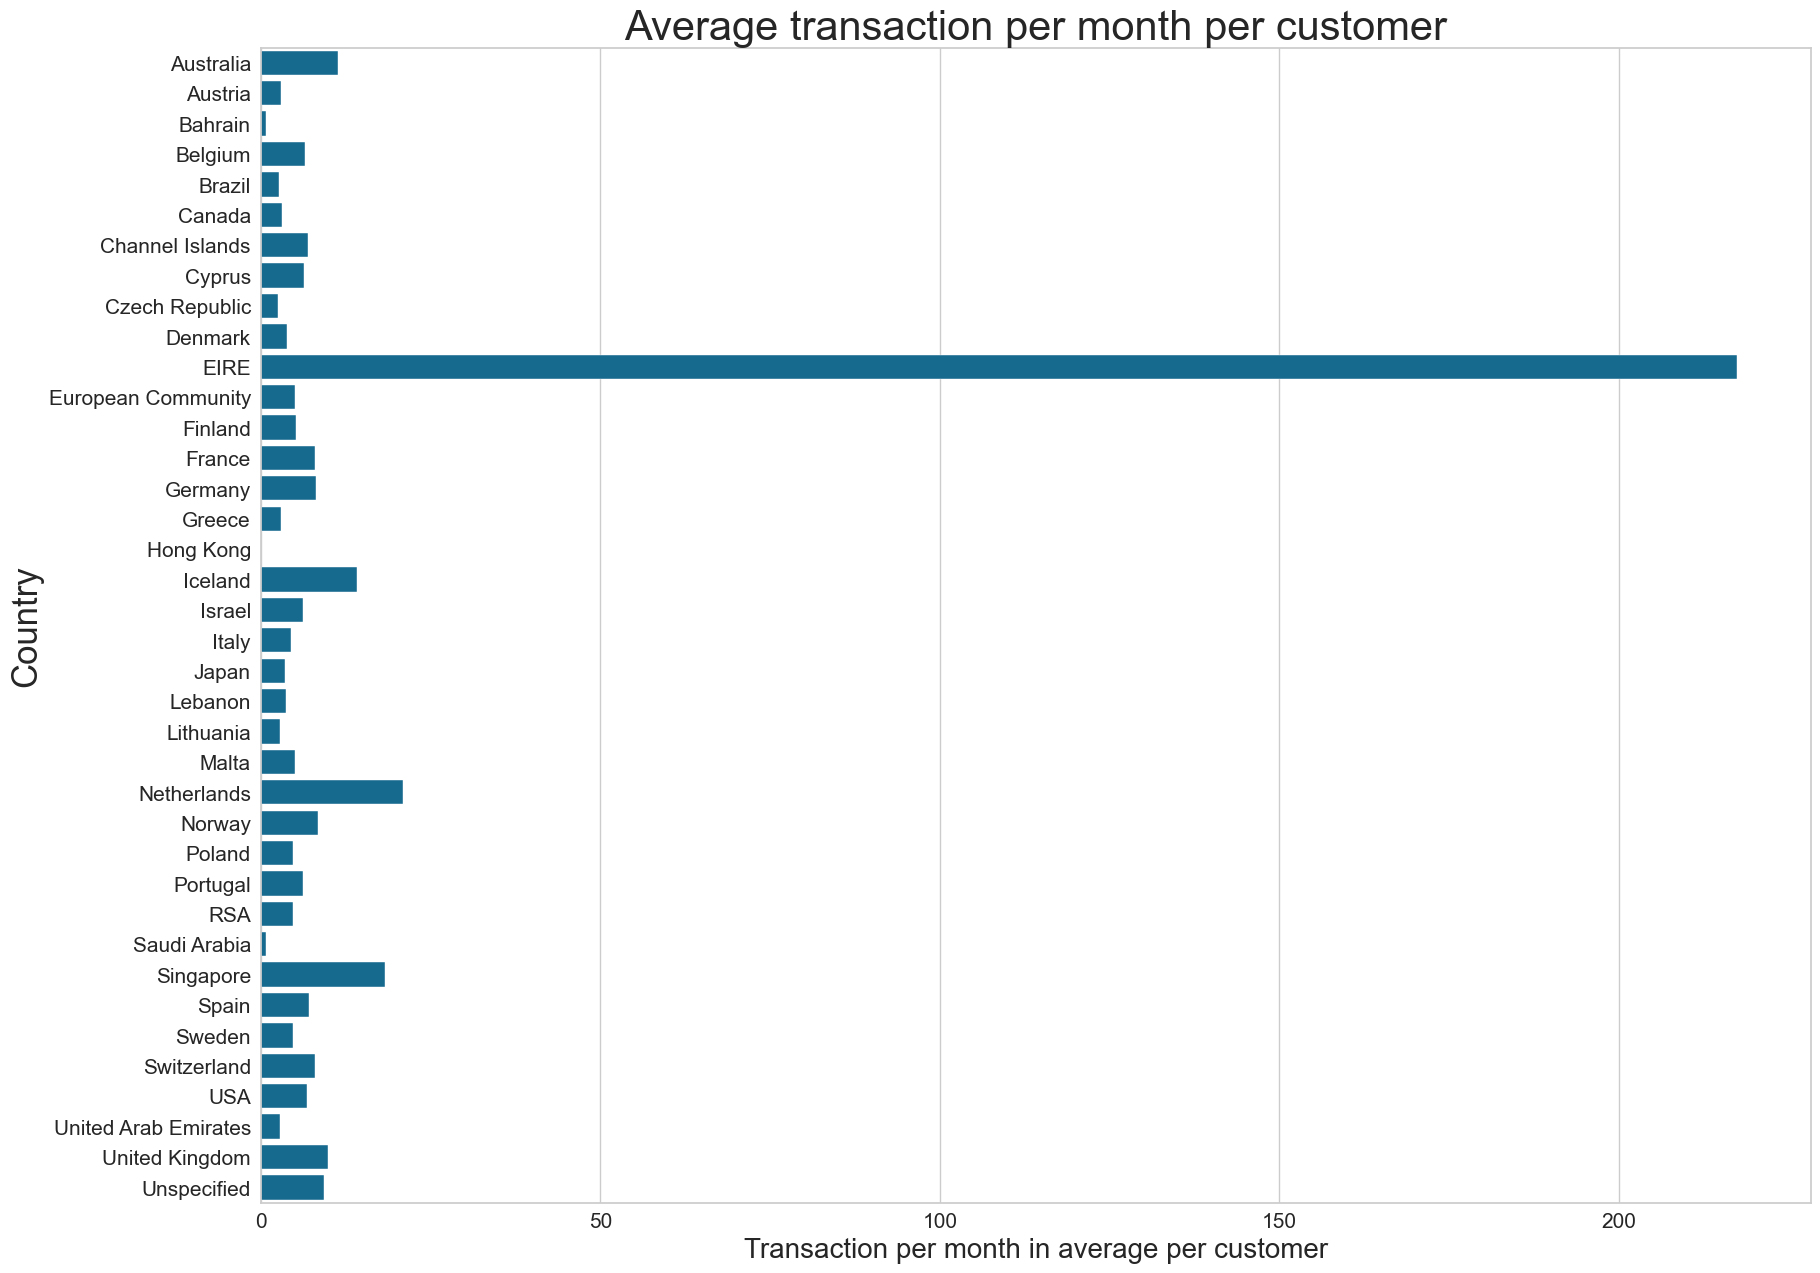

In [414]:
plt.figure(figsize=(20,15))
sns.barplot(data = transactions_per_customer_per_countries , x = 'Value' , y = 'Country')
plt.title("Average transaction per month per customer" , size = 30)
plt.xlabel("Transaction per month in average per customer" , size = 20)
plt.ylabel("Country" , size = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

> 📌 This graph highlights that in average, customers will customers will make around 10 transactions per month. There is one big exception with Iceland, where there is an average of 171 transaction but this is linked to only 1 customers.
>
> It is also visible that most of the customers comes from UK with almost 4,000 unique customers, then France and Germany far behind with around 100.

---

### How many new customers each month ?

In [415]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [416]:
#finding the number of unique customers in each month
number_customers = df.groupby(df['InvoiceDate'].dt.to_period('M'))['CustomerID'].nunique()
number_customers = pd.DataFrame(data = number_customers).reset_index()
number_customers['Date'] = number_customers.InvoiceDate.dt.to_timestamp()
number_customers

,InvoiceDate,CustomerID,Date
0,2010-12,946,2010-12-01
1,2011-01,778,2011-01-01
2,2011-02,796,2011-02-01
3,2011-03,1017,2011-03-01
4,2011-04,893,2011-04-01
5,2011-05,1076,2011-05-01
6,2011-06,1051,2011-06-01
7,2011-07,987,2011-07-01
8,2011-08,978,2011-08-01
9,2011-09,1299,2011-09-01


In [417]:
number_new_customers = []
customers_seen = []
for month in df['InvoiceDate'].dt.to_period("M").unique():
    customers = df[df['InvoiceDate'].dt.to_period('M') == month].CustomerID.unique()
    count = 0
    for customer in customers:
        if customer not in customers_seen:
            count+=1
            customers_seen.append(customer)
    number_new_customers.append((month ,count))
number_new_customers = pd.DataFrame(number_new_customers , columns = ['Date' , 'New customers'])
number_new_customers.Date = number_new_customers.Date.dt.to_timestamp()
number_new_customers

,Date,New customers
0,2010-12-01,947
1,2011-01-01,419
2,2011-02-01,380
3,2011-03-01,443
4,2011-04-01,299
5,2011-05-01,279
6,2011-06-01,236
7,2011-07-01,190
8,2011-08-01,168
9,2011-09-01,298


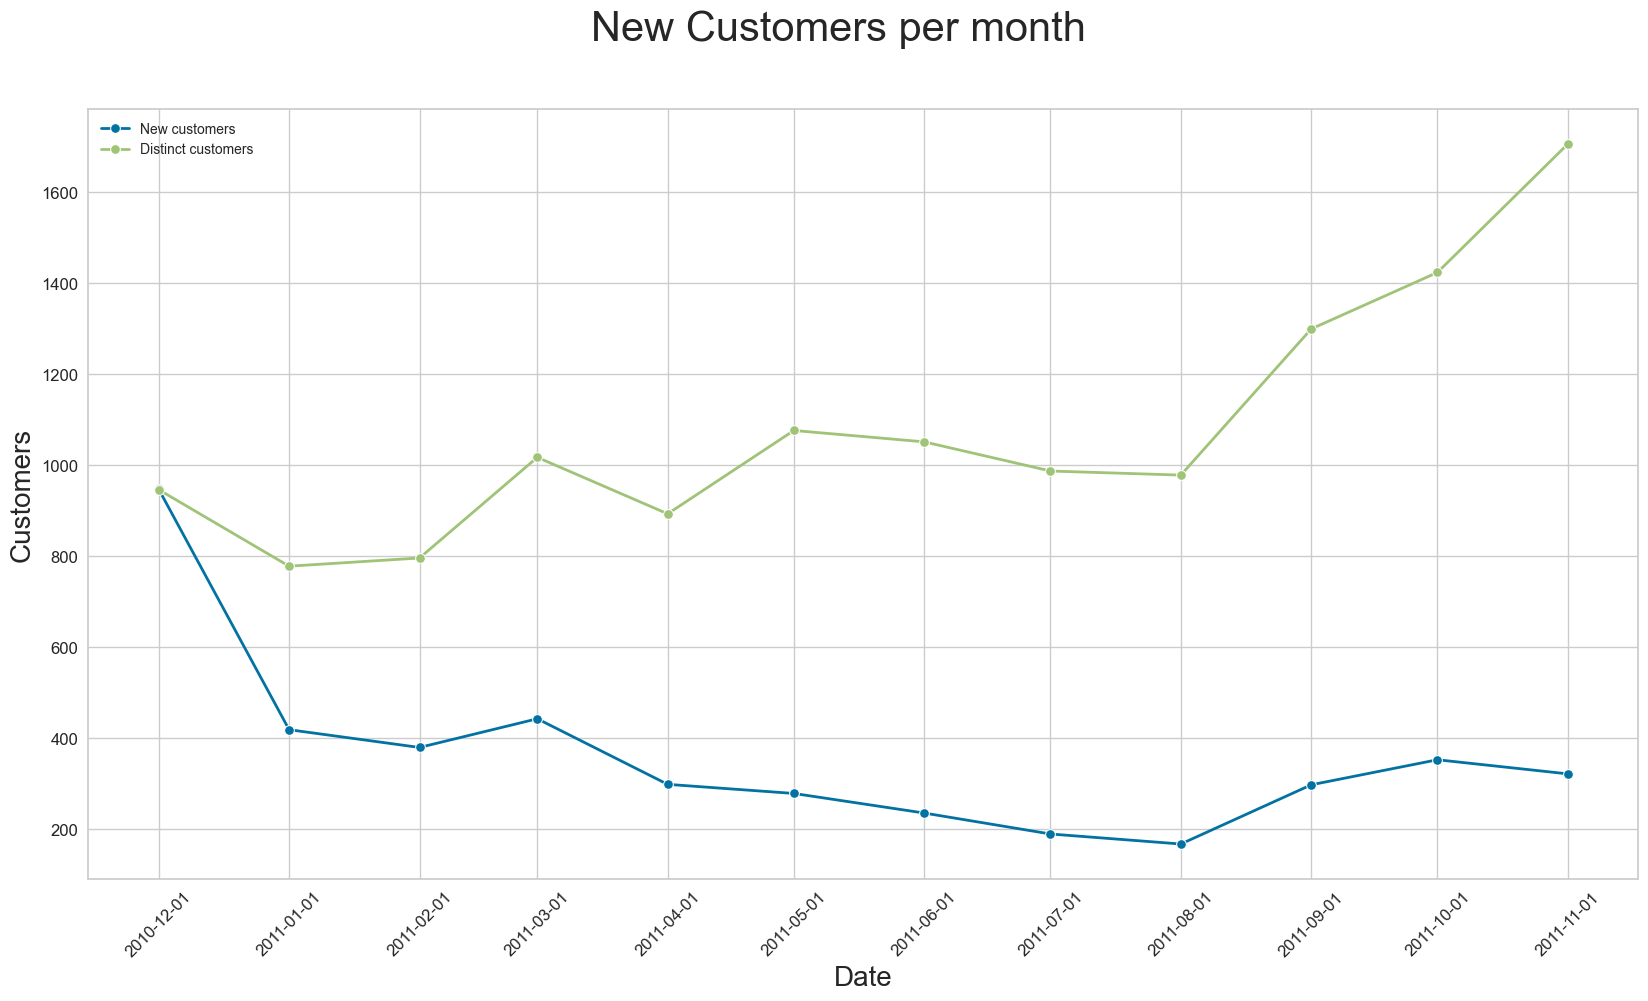

In [418]:
#visualizing the new customers per month

fig = plt.figure(figsize=(20 , 10)).suptitle('New Customers per month' , fontsize = 30)
lineplot = sns.lineplot(data = number_new_customers , x= 'Date' , y = 'New customers' , marker = 'o' , linewidth = 2 , label = 'New customers')
#creating another plot to visualize the number of customers of each month 
sns.lineplot(data=number_customers,x="Date", y="CustomerID", marker="o",linewidth = 2, label="Distinct customers")

lineplot.set_xlabel("Date" , fontsize = 20)
lineplot.set_ylabel("Customers" , fontsize = 20)
plt.xticks(dates , rotation = 45 , fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


> 📌 The number of new customers keep decreasing probably due to less attracting new customers by the marketing team or the product team which needs to be improved by giving attractive offers 

> whereas there is a significant increase in sales in august month as we can see this maybe due to marketing campain targeting new customers

---

### What time of day do customers tend to purchase products?

lets see what time of day the customers tend to purchase items more .

calculate the sales of each date with quantity sum

divide the sales to months and further to hours

combine all the hours of every month and year 

label the hours based on early morning , morning , after noon , evening , night , midnight

visualize the same

In [419]:
df.head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10


In [420]:
temp_df = df.groupby([df.CustomerID , df.InvoiceDate]).Quantity.sum()
temp_df = pd.DataFrame(data = temp_df).reset_index()

In [421]:
temp_df['Hour'] = temp_df['InvoiceDate'].dt.hour
temp_df['Month'] = temp_df['InvoiceDate'].dt.to_period('M')
temp_df

,CustomerID,InvoiceDate,Quantity,Hour,Month
0,12347.0,2010-12-07 14:57:00,319,14,2010-12
1,12347.0,2011-01-26 14:30:00,315,14,2011-01
2,12347.0,2011-04-07 10:43:00,483,10,2011-04
3,12347.0,2011-06-09 13:01:00,196,13,2011-06
4,12347.0,2011-08-02 08:48:00,277,8,2011-08
...,...,...,...,...,...
20947,18283.0,2011-11-23 13:27:00,251,13,2011-11
20948,18283.0,2011-11-30 12:59:00,134,12,2011-11
20949,18287.0,2011-05-22 10:39:00,488,10,2011-05
20950,18287.0,2011-10-12 10:23:00,990,10,2011-10


In [422]:
def daytime_encoder(date):
    if (date.hour >= 5)&(date.hour < 8):
        return "Early morning"
    elif (date.hour >= 8)&(date.hour < 11):
        return "Morning"
    elif (date.hour >= 11)&(date.hour < 13):
        return "Late morning"
    elif (date.hour >= 13)&(date.hour < 14):
        return "Early afternoon"
    elif (date.hour >= 14)&(date.hour < 15):
        return "Afternoon"
    elif (date.hour >= 15)&(date.hour < 17):
        return "Late afternoon"
    elif (date.hour >= 17)&(date.hour < 21):
        return "Evening"
    else:
        return date.hour

temp_df['InvoiceDate'] = temp_df['InvoiceDate'].map(daytime_encoder)
temp_df

,CustomerID,InvoiceDate,Quantity,Hour,Month
0,12347.0,Afternoon,319,14,2010-12
1,12347.0,Afternoon,315,14,2011-01
2,12347.0,Morning,483,10,2011-04
3,12347.0,Early afternoon,196,13,2011-06
4,12347.0,Morning,277,8,2011-08
...,...,...,...,...,...
20947,18283.0,Early afternoon,251,13,2011-11
20948,18283.0,Late morning,134,12,2011-11
20949,18287.0,Morning,488,10,2011-05
20950,18287.0,Morning,990,10,2011-10


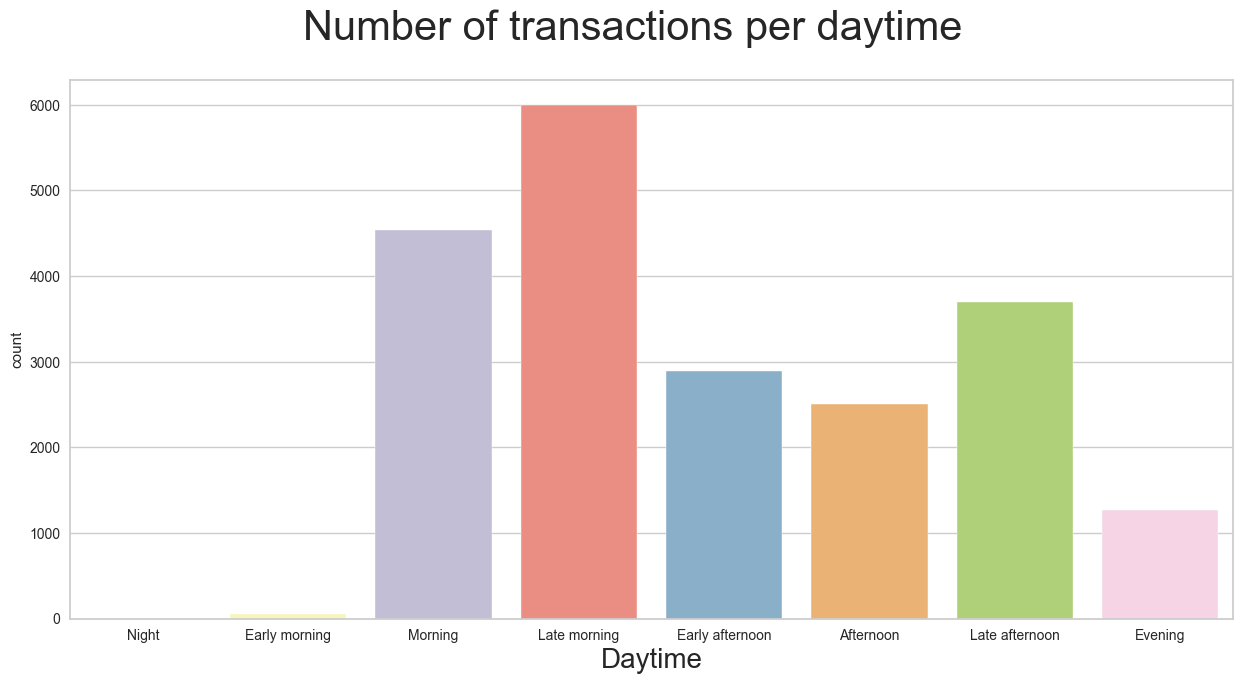

In [423]:
fig = plt.figure(figsize=(15,7)).suptitle("Number of transactions per daytime" , fontsize = 30)
countplot = sns.countplot(data = temp_df , x = 'InvoiceDate' ,order = ["Night","Early morning","Morning","Late morning","Early afternoon","Afternoon","Late afternoon","Evening"] , palette='Set3')
countplot.set_xlabel('Daytime' , fontsize = 20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

>  📌 It seems that most of the transaction are made during late morning between 11am and 12am. 
> On early morning though between 5am and 8am, there are not a lot of transactions made. And at night there are litterally no transactions at all.

---

--- 

# <p style="background-color:#5C739C;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">3. Clustering - Segmentation of the customers</p>

In [424]:
#creating a reference date to find out the recency ( today_date - invoice date) -> gives us how many days its been since purchase
today_date = dt.datetime(2011 , 12 , 1)
#aggreagting all the recency , frequemcy , monetary columns to clustering dataset
df_clustering = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda InvoiceDate : (today_date - InvoiceDate.max()).days ,
    'InvoiceNo' :'nunique' , 
    'TotalPrice' : 'sum'
})

df_clustering.columns = ['recency' , 'frequency' , 'Monetary']
df_clustering

,recency,frequency,Monetary
CustomerID,,,
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40
12352.0,27,11,1545.41
...,...,...,...
18280.0,268,1,180.60
18281.0,171,1,80.82
18282.0,113,2,98.76


In [425]:
#standardization of the data 

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(data = df_scaled , columns=['recency' , 'frequency' , 'monetary'])
df_scaled['CustomerID'] = df_clustering.index
df_scaled = df_scaled.set_index('CustomerID' , drop = True)
df_scaled

,recency,frequency,monetary
CustomerID,,,
12347.0,-0.606909,0.125885,0.399207
12348.0,-0.244519,-0.098893,0.018537
12349.0,-0.818303,-0.436058,0.011933
12350.0,2.121083,-0.436058,-0.224852
12352.0,-0.637108,0.687828,-0.023363
...,...,...,...
18280.0,1.788892,-0.436058,-0.250442
18281.0,0.812452,-0.436058,-0.267043
18282.0,0.228602,-0.323670,-0.264058


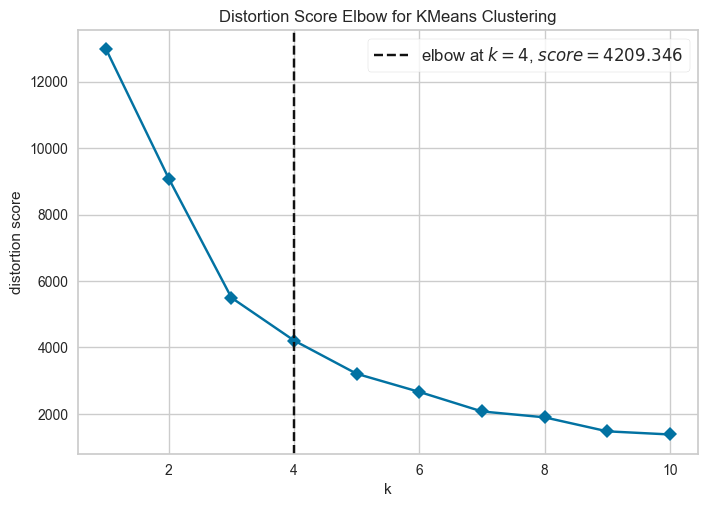

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [426]:
#To determine the optimal number of clusters , lets use the elbow method
model = KMeans()
visualizer = KElbowVisualizer(model , k = (1,11) , timings= False , random_state = 42)
visualizer.fit(df_scaled)
visualizer.show()

In [427]:
kmeans = KMeans(n_clusters=4 , n_init=15 , random_state= 42)
kmeans.fit(df_scaled)

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids , columns= list(df_scaled))
centroid_df

,recency,frequency,monetary
0,-0.503831,-0.074940,-0.071126
1,1.515637,-0.345884,-0.209335
2,-0.784228,2.431537,1.446023
3,-0.861314,11.088882,14.211831


In [428]:
df_labels = pd.DataFrame(kmeans.labels_ , columns= ['labels'])
df_labels['labels'] = df_labels['labels'].astype('category')

In [429]:
df_kmeans = df_clustering.copy()
df_kmeans['labels'] = df_labels['labels'].values
df_kmeans

,recency,frequency,Monetary,labels
CustomerID,,,,
12347.0,30,6,4085.18,0
12348.0,66,4,1797.24,0
12349.0,9,1,1757.55,0
12350.0,301,1,334.40,1
12352.0,27,11,1545.41,0
...,...,...,...,...
18280.0,268,1,180.60,1
18281.0,171,1,80.82,1
18282.0,113,2,98.76,0


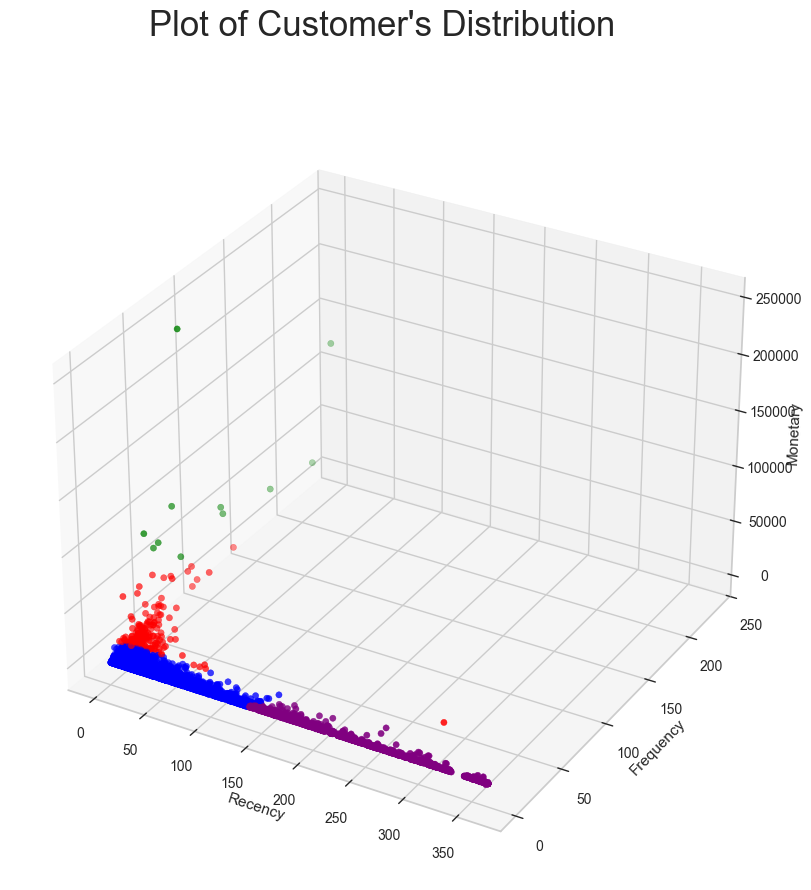

In [430]:
colors = np.array(["blue", "purple","red","green"])
fig  = plt.figure(figsize = (10,10)).suptitle('Plot of Customer\'s Distribution', fontsize=25)
ax = plt.axes(projection='3d')
ax.scatter3D(df_kmeans["recency"], df_kmeans["frequency"], df_kmeans["Monetary"], marker='o', c=colors[df_kmeans["labels"].tolist()])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [431]:
agg_list = ['mean' , 'count' , 'max']
df_kmeans[['labels' , 'recency' , 'frequency' , 'Monetary']].groupby('labels').agg(agg_list)

recency              frequency                 Monetary        \
              mean count  max        mean count  max          mean count   
labels                                                                     
0        40.207195  3002  154    4.214191  3002   18   1258.343632  3002   
1       240.761948  1109  364    1.801623  1109   13    428.404852  1109   
2        12.385000   200  293   26.515000   200  126  10376.859050   200   
3         4.727273    11   16  103.545455    11  234  87103.147273    11   

                   
              max  
labels             
0        11056.93  
1         9861.38  
2        50415.49  
3       248682.54

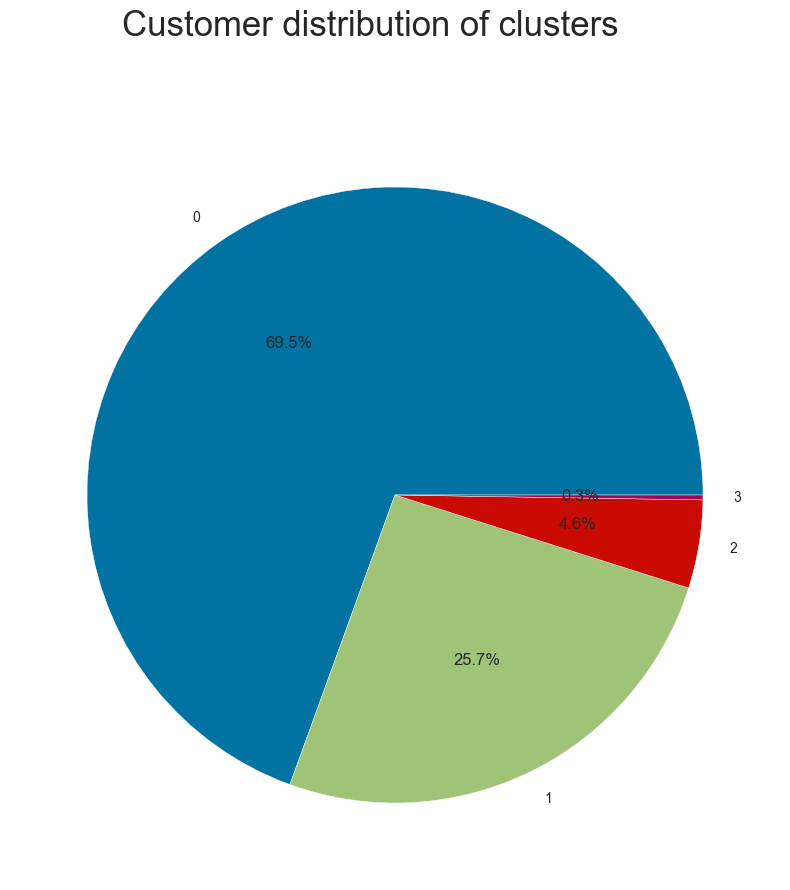

In [434]:
df_kmeans = df_kmeans.reset_index()
cluster_counts = df_kmeans.groupby('labels').agg({'CustomerID' : 'count'})
cluster_counts.reset_index(inplace = True)
cluster_counts.columns = ['cluster' , 'count']

fig = plt.figure(figsize=(20 , 10)).suptitle('Customer distribution of clusters', fontsize = 25)
plt.pie(cluster_counts['count'] , labels = cluster_counts['cluster']  , autopct= '%.01f%%')
plt.show()

> 📌 From the KMeans clustering, we can sort every customer into 4 different clusters that seems to have different behaviours.
> - **Cluster 0**: "Punctual customers" - Those are the customers that buys more punctually items on the website.
> - **Cluster 1**: "Hibernating customers" - Those are the customers that buys at the lowest frequency, the lowest recently and that spend the least money.
> - **Cluster 2**: "Exceptional customers" - Those are the customers that we want to keep, that buys at the highest frequency, the most recently and that spend the most money. 
> - **Cluster 3**: " Recent customers" - Those are customers that have been active quite recently that might be interesting to keep stimulated.
> 
> The total distorsion score obtained is 4129 using the recency, the frequency and the monetary.